In [1]:
import os, sys
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import matplotlib as mpl
import scanpy as sc
import torch

# add path of Tangram repository for importing it
sys.path.append("./Tangram") 
import tangram as tg

## Mapping

AnnData object with n_obs × n_vars = 27261 × 17919
    obs: 'x', 'y'


/home/myp2113/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


View of AnnData object with n_obs × n_vars = 13829 × 17919
    obs: 'x', 'y'

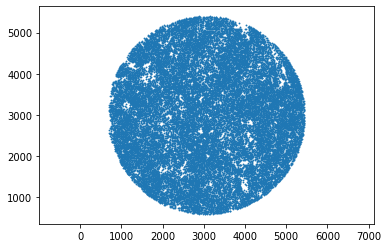

In [2]:
path = os.path.join('data', 'corrected_ad_sp.h5ad')
ad_sp = sc.read_h5ad(path)

print(ad_sp)

plt.axis('equal')
plt.scatter(ad_sp.obs.x.values, 
            ad_sp.obs.y.values, 
            s=.7)

ad_sp = ad_sp[ad_sp.obs.x <= (ad_sp.obs.x.max() - ad_sp.obs.x.min()) / 2 + ad_sp.obs.x.min()]
ad_sp

sc data might also be ought to only have test data because otherwise there are ones in sc data that is already mapped.

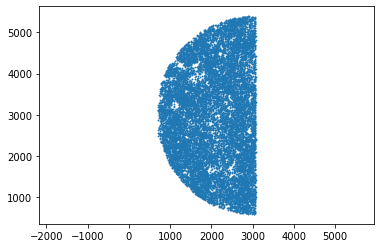

In [3]:
plt.axis('equal')
plt.scatter(ad_sp.obs.x.values, 
            ad_sp.obs.y.values, 
            s=.7)

In [4]:
# single-cell data need the following steps:
# 1. remove mitochondrial genes, which are removed in this data set
# 2. normalization
# 3. log(1+p) transformation: not necessary for mapping; necessary for selecting marker genes

path = os.path.join('data', 'corrected_ad_sc.h5ad')
ad_sc = sc.read_h5ad(path)
sc.pp.normalize_total(ad_sc)
ad_sc

AnnData object with n_obs × n_vars = 26139 × 2505
    obs: 'cluster', 'subcluster'

In [5]:
# load marker genes processed from another file
df_genes = pd.read_csv('data/puck_markers15.csv', index_col=0)
markers = df_genes.values.flatten()
print(len(markers))
markers

165


array(['Apoe', 'Slc1a3', '1500015O10Rik', 'Bsg', 'Neurod1', 'Tmsb4x',
       'Cst3', 'Plp1', 'Atp1b1', 'Pvalb', 'Car8', 'Atp1a2', 'Sparcl1',
       'Apoe', 'Pltp', 'Snap25', 'C1qb', 'Sparc', 'Enpp2', 'Gnas',
       'Atp1b1', 'Itpr1', 'Mt1', 'Atp1a2', 'Clu', 'Tmsb4x', 'Chn2',
       'C1qc', 'Cald1', 'Cnp', 'App', 'Slc24a2', 'Pcp4', 'Aqp4', 'Aldoc',
       'Pcp4l1', 'Ly6c1', 'Rbfox3', 'Cst3', 'Atp1a2', 'Mag', 'Ttc3',
       'Cacng2', 'Pvalb', 'Sparcl1', 'Apoe', 'Dbi', 'Itm2a', 'Stmn2',
       'C1qa', 'Igfbp7', 'Trf', 'Syt1', 'Slc6a1', 'Calb1', 'Cd81', 'Mt1',
       'Chchd10', 'Flt1', 'Cplx2', 'B2m', 'Vtn', 'Mbp', 'Ndrg4',
       'Camk2n1', 'Nsg1', 'Mt2', 'Dbi', 'Mt3', 'Sparc', 'Nrep', 'Actb',
       'Actb', 'Cldn11', 'Atp1a3', 'Gabra1', 'Pcp2', 'Aldoc', 'Gpr37l1',
       'Cst3', 'Ly6a', 'Chgb', 'Csf1r', 'Sparcl1', 'Aplp1', 'Nefl',
       'Kcna2', 'Dner', 'Cst3', 'Pla2g7', 'Fth1', 'Cldn5', 'Gabra6',
       'Rplp1', 'Ptn', 'Cryab', 'Scg2', 'Kit', 'Rgs8', 'Pla2g7', 'Ppap2b',
       'Fxyd1',

In [6]:
# Tangram makes sure the gene orders are the same for both datasets
# genes=None uses all genes
# genes=markers uses marker genes defined in a list `markers`
ad_sc, ad_sp = tg.pp_adatas(ad_sc, ad_sp, genes=markers)

In [7]:
ad_sc

View of AnnData object with n_obs × n_vars = 26139 × 135
    obs: 'cluster', 'subcluster'

In [8]:
ad_sp

View of AnnData object with n_obs × n_vars = 13829 × 135
    obs: 'x', 'y'

In [9]:
assert ad_sc.var.index.equals(ad_sp.var.index)

In [10]:
ad_map = tg.map_cells_to_space(
    adata_cells=ad_sc,
    adata_space=ad_sp,
#     device='cpu',
    device='cuda:0'
)

RuntimeError: No CUDA GPUs are available

In [11]:
# ad_map.write_h5ad('cerebellum_corrected_ad_map_portion5_top15.h5ad')

## Analysis

In [6]:
import os, sys
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import matplotlib as mpl
import scanpy as sc
import torch

# add path of Tangram repository for importing it
sys.path.append("./Tangram") 
import tangram as tg

In [7]:
# mapped result
ad_map = sc.read_h5ad('cerebellum_corrected_ad_map_portion5_top15.h5ad')

In [53]:
ad_map

AnnData object with n_obs × n_vars = 26139 × 13829
    obs: 'cluster', 'subcluster'
    var: 'x', 'y'
    uns: 'train_genes_df'

In [20]:
ad_map.uns['train_genes_df'].index

Index(['Ttr', 'Mia', 'Nnat', '1500015O10Rik', 'Ppp1r17', 'Hexb', 'Itgb1',
       'Cx3cr1', 'Calb1', 'Enpp2',
       ...
       'Nrep', 'Neurod1', 'Chn2', 'Cplx2', 'Rbfox3', 'Chgb', 'Stmn2', 'App',
       'Gnas', 'Ttc3'],
      dtype='object', length=135)

In [8]:
# single-cell data
path = os.path.join('data', 'corrected_ad_sc.h5ad')
ad_sc = sc.read_h5ad(path)
sc.pp.normalize_total(ad_sc)
tg.annotate_gene_sparsity(ad_sc)
ad_sc

AnnData object with n_obs × n_vars = 26139 × 2505
    obs: 'cluster', 'subcluster'
    var: 'sparsity'

In [46]:
ad_sc.var.index

Index(['0610010F05Rik', '0610030E20Rik', '1110004E09Rik', '1110019D14Rik',
       '1110037F02Rik', '1110046J04Rik', '1110059G10Rik', '1190003K10Rik',
       '1200014J11Rik', '1300002E11Rik',
       ...
       'Zmynd11', 'Zmynd8', 'Znhit6', 'Znrd1as', 'Zranb1', 'Zranb2', 'Zrsr1',
       'Zrsr2', 'Zyg11b', 'Zzef1'],
      dtype='object', length=2505)

In [9]:
# spatial data
path = os.path.join('data', 'corrected_ad_sp.h5ad')
ad_sp = sc.read_h5ad(path)
ad_sp = ad_sp[ad_sp.obs.x <= (ad_sp.obs.x.max() - ad_sp.obs.x.min()) / 2 + ad_sp.obs.x.min()]
ad_sp

/home/myp2113/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


View of AnnData object with n_obs × n_vars = 13829 × 17919
    obs: 'x', 'y'

In [8]:
# not_train_genes = ad_sp.var.loc[~ad_sp.var.index.isin(ad_map.uns['train_genes_df'].index)]
# not_train_genes = not_train_genes.loc[not_train_genes.index.isin(ad_sc.var.index)]
# not_train_genes  # looking at the tail, the mitochondrian genes are not removed

""
0610010F05Rik
0610030E20Rik
1110004E09Rik
1110019D14Rik
1110037F02Rik
...
Zranb2
Zrsr1
Zrsr2
Zyg11b


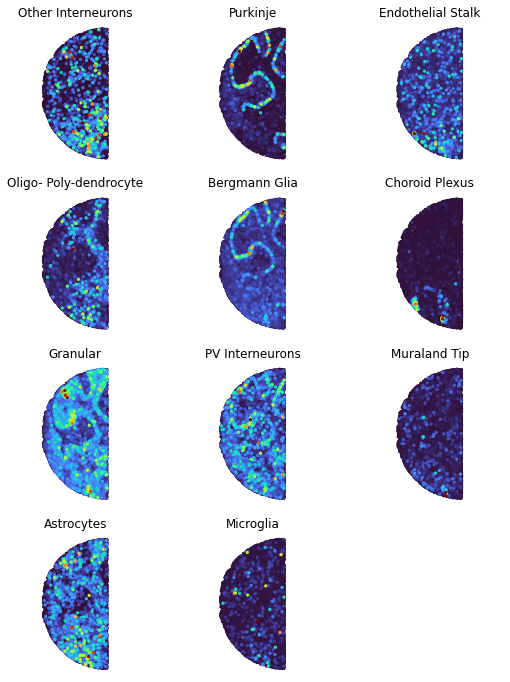

In [10]:
# check how to make the figure larger
tg.plot_cell_annotation(ad_map, annotation='cluster', nrows=4, ncols=3, cmap='turbo')

In [21]:
# ad_sc.X.sum(axis=1)

In [11]:
ad_ge = tg.project_genes(adata_map=ad_map, adata_sc=ad_sc)
ad_ge

AnnData object with n_obs × n_vars = 13829 × 2505
    obs: 'x', 'y'
    var: 'sparsity', 'is_training'

In [6]:
df_all_genes = tg.compare_spatial_geneexp(ad_ge, ad_sp)
df_all_genes

Trying to set attribute `.var` of view, copying.
Trying to set attribute `.var` of view, copying.
./Tangram/tangram/utils.py:162: RuntimeWarning: invalid value encountered in float_scalars
  cos_sims.append((v1 @ v2) / norm_sq)


,score,is_training,sparsity_1,sparsity_2
Ttr,0.990721,True,0.0,0.893846
Mia,0.985646,True,0.0,0.994432
Nnat,0.975564,True,0.0,0.979174
1500015O10Rik,0.971474,True,0.0,0.992841
Ppp1r17,0.971195,True,0.0,0.972811
...,...,...,...,...
Gm38148,NaN,False,0.0,1.000000
Pln,NaN,False,0.0,1.000000
RP23-7E4.3,NaN,False,0.0,1.000000
Stab1,NaN,False,0.0,1.000000


In [7]:
df_plot = df_all_genes[df_all_genes.is_training==False].rename(columns={"sparsity_2": "sparsity_sp"})
df_plot['sparsity_sc'] = ad_sc.var.sparsity.loc[df_plot.index]
df_plot['sparsity_diff'] = df_plot.sparsity_sp-df_plot.sparsity_sc
df_plot

,score,is_training,sparsity_1,sparsity_sp,sparsity_sc,sparsity_diff
Ptgds,0.808272,False,0.0,0.839395,0.962623,-0.123227
Ckb,0.688698,False,0.0,0.700051,0.180458,0.519592
Calm1,0.650820,False,0.0,0.715381,0.029764,0.685617
Ubb,0.619915,False,0.0,0.720732,0.273691,0.447041
Ndufa4,0.585458,False,0.0,0.735845,0.257317,0.478528
...,...,...,...,...,...,...
Gm38148,NaN,False,0.0,1.000000,0.999847,0.000153
Pln,NaN,False,0.0,1.000000,0.998470,0.001530
RP23-7E4.3,NaN,False,0.0,1.000000,0.999350,0.000650
Stab1,NaN,False,0.0,1.000000,0.996710,0.003290


In [8]:
df_plot_scores = df_plot[~df_plot.score.isna()]
df_plot_scores

,score,is_training,sparsity_1,sparsity_sp,sparsity_sc,sparsity_diff
Ptgds,8.082718e-01,False,0.0,0.839395,0.962623,-0.123227
Ckb,6.886976e-01,False,0.0,0.700051,0.180458,0.519592
Calm1,6.508205e-01,False,0.0,0.715381,0.029764,0.685617
Ubb,6.199147e-01,False,0.0,0.720732,0.273691,0.447041
Ndufa4,5.854585e-01,False,0.0,0.735845,0.257317,0.478528
...,...,...,...,...,...,...
Gm16755,4.901881e-07,False,0.0,0.999928,0.998584,0.001343
Tdrd12,3.620546e-07,False,0.0,0.999928,0.999656,0.000272
RP23-403P24.5,3.430856e-07,False,0.0,0.999783,0.998011,0.001772
Sec14l4,2.248627e-07,False,0.0,0.999928,0.999005,0.000922


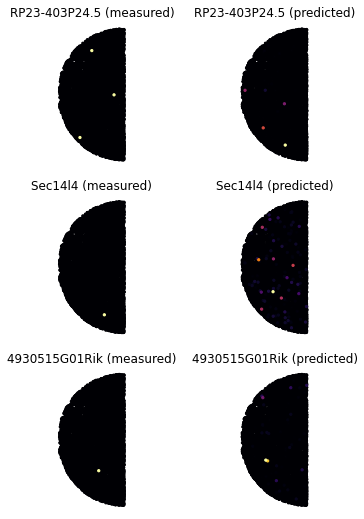

In [18]:
# low testing scores
genes = ['RP23-403P24.5', 'Sec14l4', '4930515G01Rik']
    
tg.plot_genes(genes, adata_measured=ad_sp, adata_predicted=ad_ge)

/home/myp2113/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


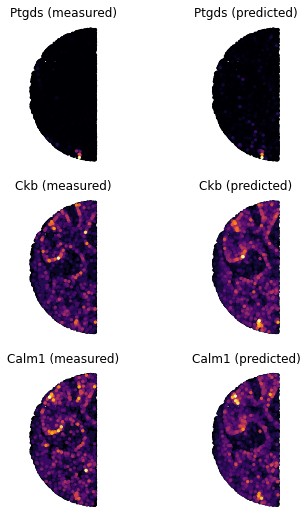

In [17]:
# high testing scores
genes = ['Ptgds', 'Ckb', 'Calm1']
    
tg.plot_genes(genes, adata_measured=ad_sp, adata_predicted=ad_ge)

In [13]:
def plot_scores(df_plot, bins=10, alpha=.7):
    
    import matplotlib.pyplot as plt
    import seaborn as sns

    fig, axs = plt.subplots(2, 2, sharey=True, dpi=300, figsize=(7, 7))

    axs_f = axs.flatten()

    axs_f[0].set_box_aspect(1)
    axs_f[0].set_title('Testing scores')
    sns.histplot(data=df_plot, y='score', bins=bins, ax=axs_f[0]);

    axs_f[1].set_box_aspect(1)
    axs_f[1].set_title('score vs sparsity (single cells)')
    sns.scatterplot(data=df_plot, y='score', x='sparsity_sc', ax=axs_f[1], alpha=alpha)

    axs_f[2].set_box_aspect(1)
    axs_f[2].set_title('score vs sparsity (spatial)')
    sns.scatterplot(data=df_plot, y='score', x='sparsity_sp', ax=axs_f[2], alpha=alpha)

    axs_f[3].set_box_aspect(1)
    axs_f[3].set_title('score vs sparsity (sp - sc)')
    sns.scatterplot(data=df_plot, y='score', x='sparsity_diff', ax=axs_f[3], alpha=alpha)

    plt.tight_layout()

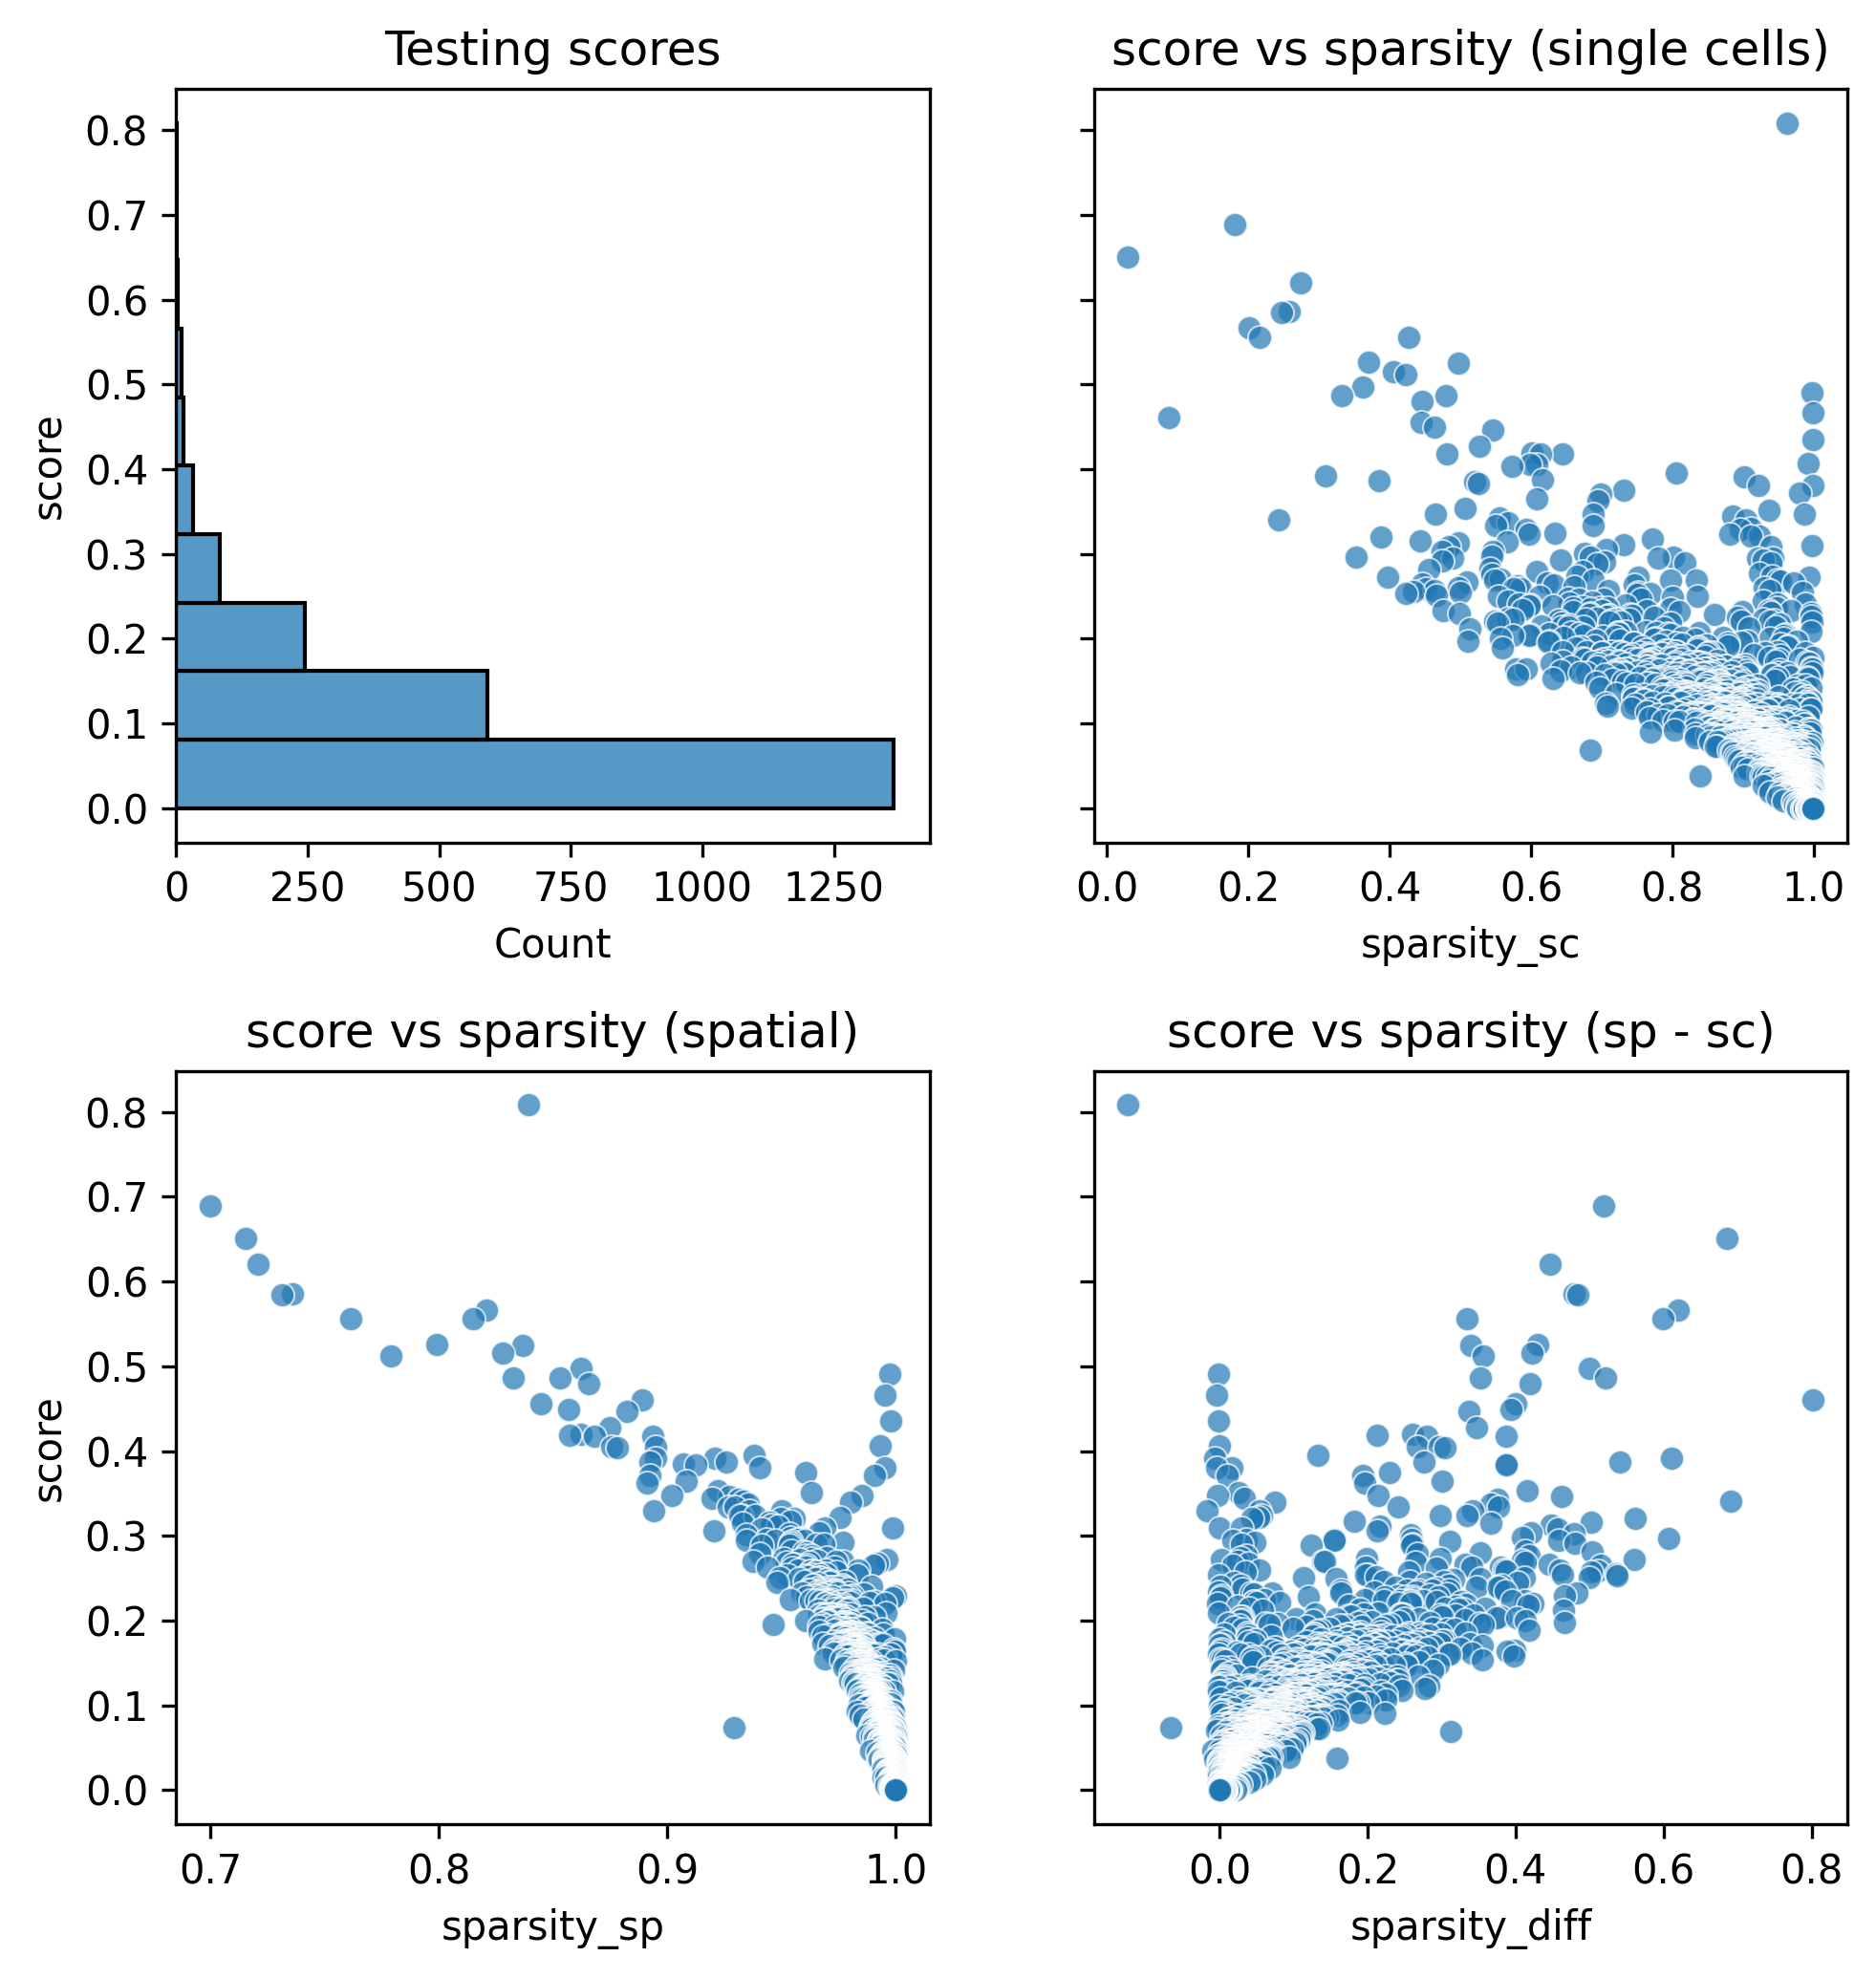

In [14]:
plot_scores(df_plot)

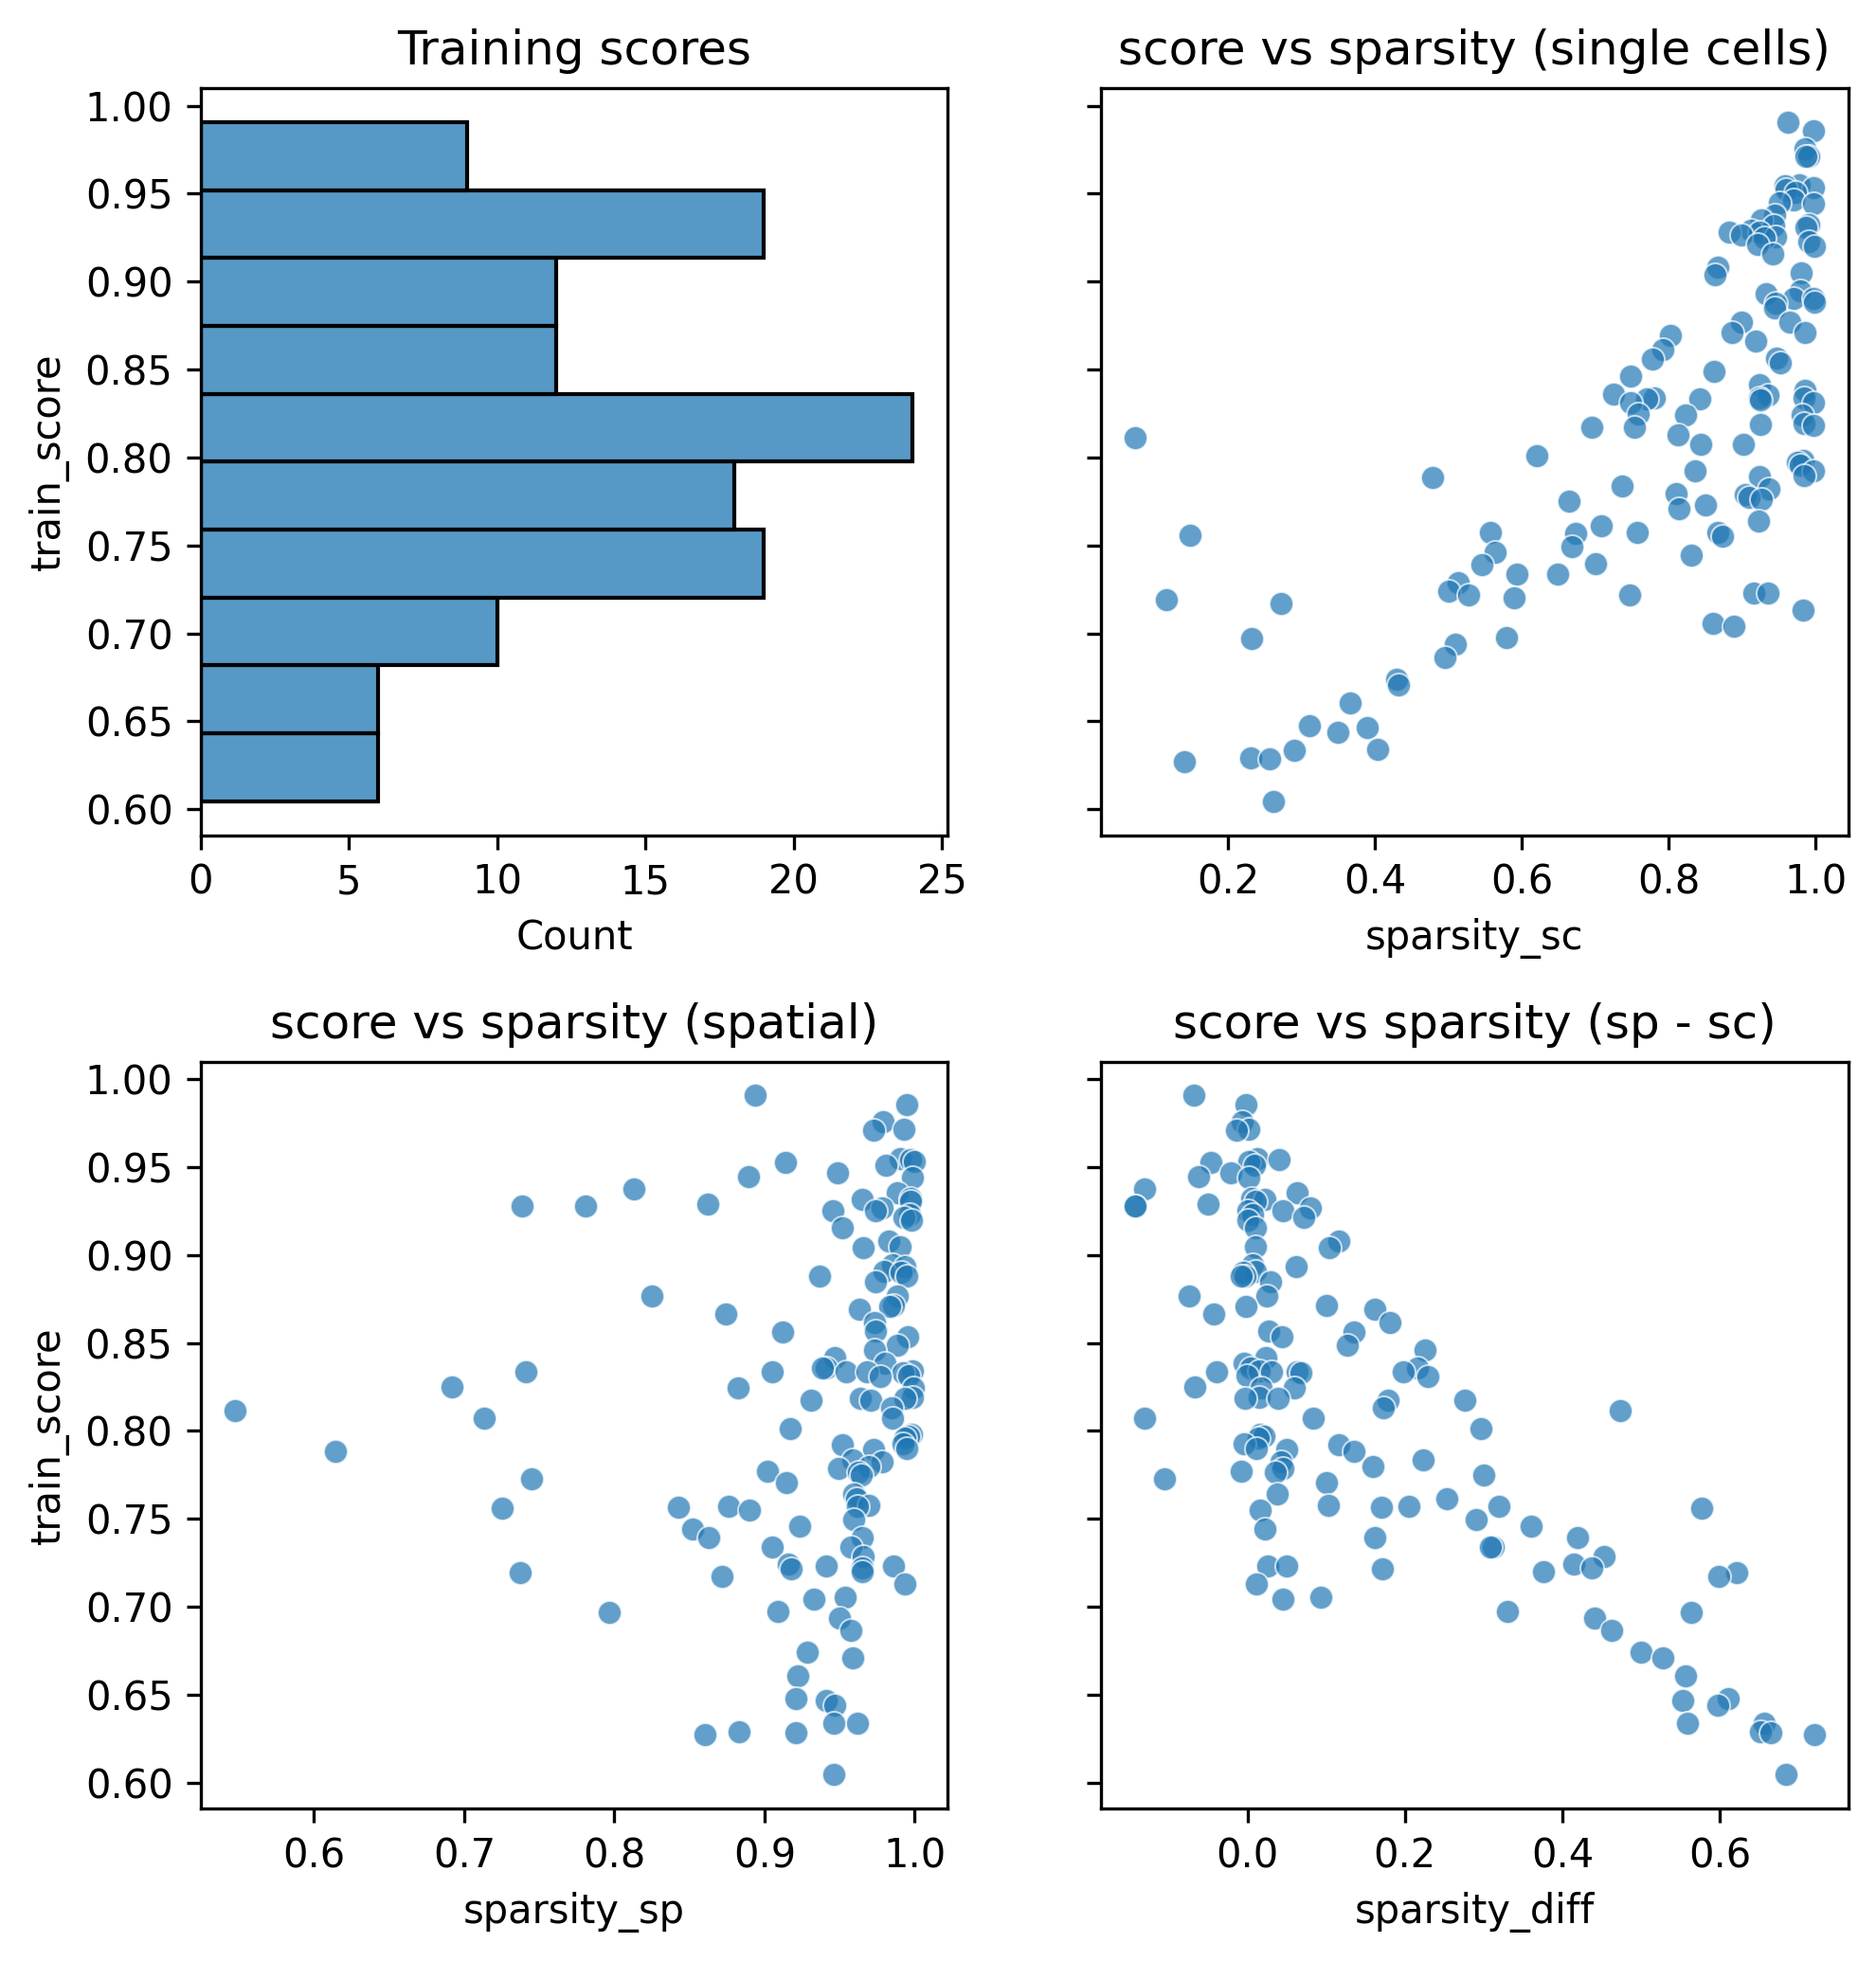

In [13]:
tg.plot_training_scores(ad_map)

In [8]:
ad_map.uns['train_genes_df'].head(10)

,train_score,sparsity_sc,sparsity_sp,sparsity_diff
Ttr,0.990721,0.962355,0.893846,-0.068509
Mia,0.985646,0.996710,0.994432,-0.002278
Nnat,0.975564,0.985501,0.979174,-0.006326
1500015O10Rik,0.971474,0.990895,0.992841,0.001946
Ppp1r17,0.971195,0.986687,0.972811,-0.013876
Hexb,0.955060,0.978002,0.990455,0.012453
Itgb1,0.954345,0.957611,0.997180,0.039569
Cx3cr1,0.953437,0.997437,0.999422,0.001985
Calb1,0.952478,0.959983,0.913877,-0.046107
Enpp2,0.950903,0.972455,0.980765,0.008310


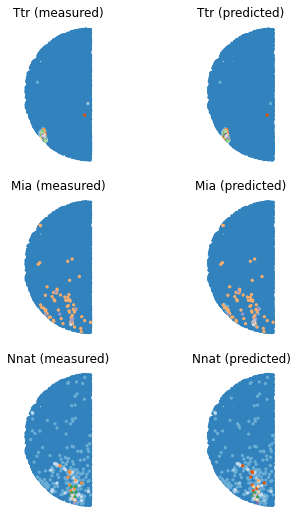

In [12]:
# high score genes
genes = ['Ttr', 'Mia', 'Nnat']
    
tg.plot_genes(genes, adata_measured=ad_sp, adata_predicted=ad_ge, cmap='tab20c')

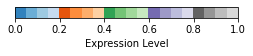

In [3]:
#### Colorbar:
fig, ax = plt.subplots(figsize=(4, 0.4))
fig.subplots_adjust(top=0.5)

cmap = 'tab20c'
cmap = plt.get_cmap(cmap)
norm = mpl.colors.Normalize(vmin=0, vmax=1, )

cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                norm=norm,
                                orientation='horizontal',
                                label='Expression Level')
#### Colorbar

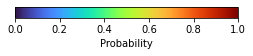

In [5]:
#### Colorbar:
fig, ax = plt.subplots(figsize=(4, 0.4))
fig.subplots_adjust(top=0.5)

cmap = 'turbo'
cmap = plt.get_cmap(cmap)
norm = mpl.colors.Normalize(vmin=0, vmax=1, )

cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                norm=norm,
                                orientation='horizontal',
                                label='Probability')
#### Colorbar

In [10]:
ad_map.uns['train_genes_df'].tail(10)

,train_score,sparsity_sc,sparsity_sp,sparsity_diff
Nrep,0.660647,0.365507,0.922409,0.556902
Neurod1,0.647700,0.310188,0.920891,0.610703
Chn2,0.646650,0.388729,0.941283,0.552553
Cplx2,0.643817,0.349248,0.946489,0.597241
Rbfox3,0.633849,0.402961,0.961675,0.558714
Chgb,0.633670,0.290141,0.946345,0.656203
Stmn2,0.629025,0.231034,0.882710,0.651676
App,0.628448,0.255786,0.920602,0.664815
Gnas,0.627283,0.139944,0.860004,0.720060
Ttc3,0.604564,0.261563,0.946345,0.684781


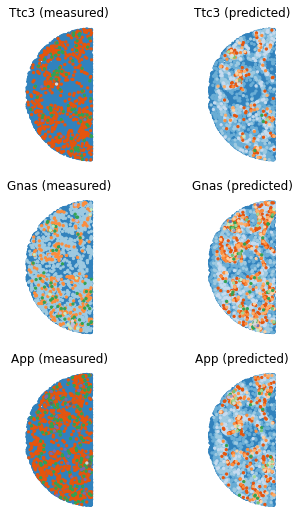

In [13]:
# low score genes
genes = ['Ttc3', 'Gnas', 'App']
tg.plot_genes(genes, adata_measured=ad_sp, adata_predicted=ad_ge, cmap='tab20c')

In [14]:
compare = tg.compare_spatial_geneexp(ad_ge, ad_sp)
compare

Trying to set attribute `.var` of view, copying.
Trying to set attribute `.var` of view, copying.
./Tangram/tangram/utils.py:162: RuntimeWarning: invalid value encountered in float_scalars
  cos_sims.append((v1 @ v2) / norm_sq)


,score,is_training,sparsity_1,sparsity_2
Ttr,0.991036,True,0.0,0.893846
Mia,0.985584,True,0.0,0.994432
Nnat,0.976713,True,0.0,0.979174
Ppp1r17,0.972402,True,0.0,0.972811
1500015O10Rik,0.972150,True,0.0,0.992841
...,...,...,...,...
Gm38148,NaN,False,0.0,1.000000
Pln,NaN,False,0.0,1.000000
RP23-7E4.3,NaN,False,0.0,1.000000
Stab1,NaN,False,0.0,1.000000


/home/myp2113/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


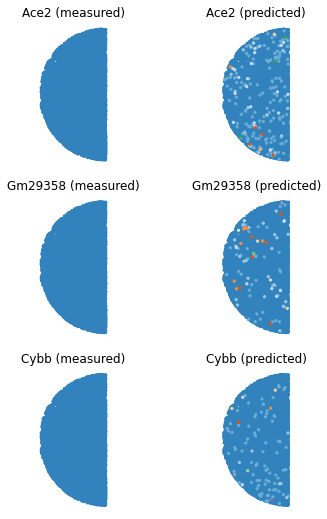

In [15]:
# no score genes
genes = ['Ace2', 'Gm29358', 'Cybb']
tg.plot_genes(genes, adata_measured=ad_sp, adata_predicted=ad_ge, cmap='tab20c')

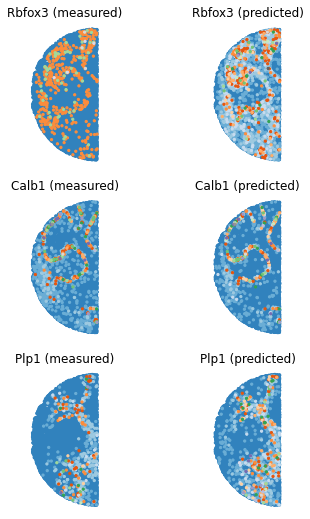

In [16]:
# marker genes of certain cell types
# Rbfox3 for gradule cells: Species and cell-type properties of classically defined human and rodent neurons and glia
# Calb1 for purkinje:
# Plp1 for oligo and astrocytes: Expression of Proteolipid Protein Gene in Spinal Cord Stem Cells and Early Oligodendrocyte Progenitor Cells Is Dispensable for Normal Cell Migration and Myelination
genes = ['Rbfox3', 'Calb1', 'Plp1']
tg.plot_genes(genes, adata_measured=ad_sp, adata_predicted=ad_ge, cmap='tab20c')

In [51]:
random.choices(not_train_genes.index, k=10)

['Bcdin3d',
 'Mettl14',
 'Lcat',
 'Krt24',
 'Eapp',
 'Tecpr1',
 'Fnbp4',
 'Egr4',
 'Erlec1',
 'Hacd2']

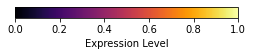

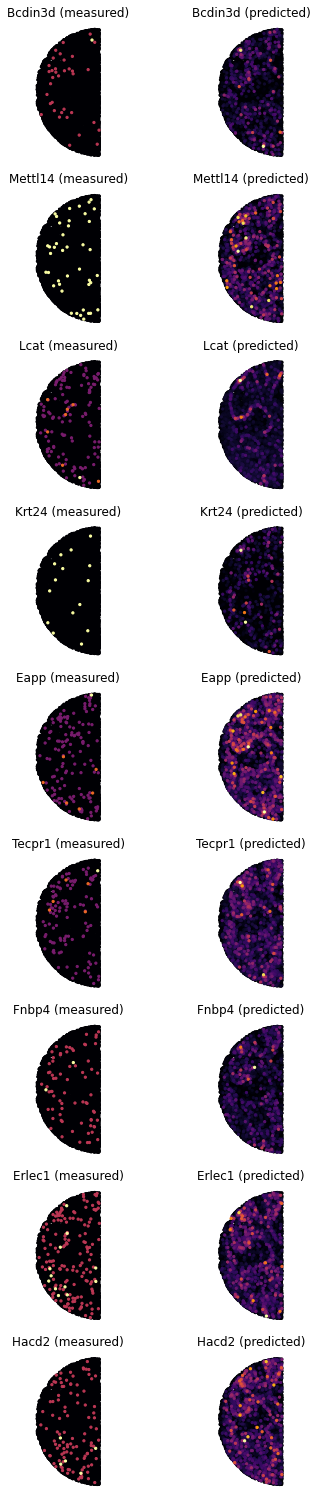

In [7]:
# genes measures in slide-seq but not a training gene
genes = ['Bcdin3d',
 'Mettl14',
 'Lcat',
 'Krt24',
 'Eapp',
 'Tecpr1',
 'Fnbp4',
 'Erlec1',
 'Hacd2']

#### Colorbar:
fig, ax = plt.subplots(figsize=(4, 0.4))
fig.subplots_adjust(top=0.5)

cmap = 'inferno'
cmap = plt.get_cmap(cmap)
norm = mpl.colors.Normalize(vmin=0, vmax=1, )

cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                norm=norm,
                                orientation='horizontal',
                                label='Expression Level')
#### Colorbar

tg.plot_genes(genes, adata_measured=ad_sp, adata_predicted=ad_ge)

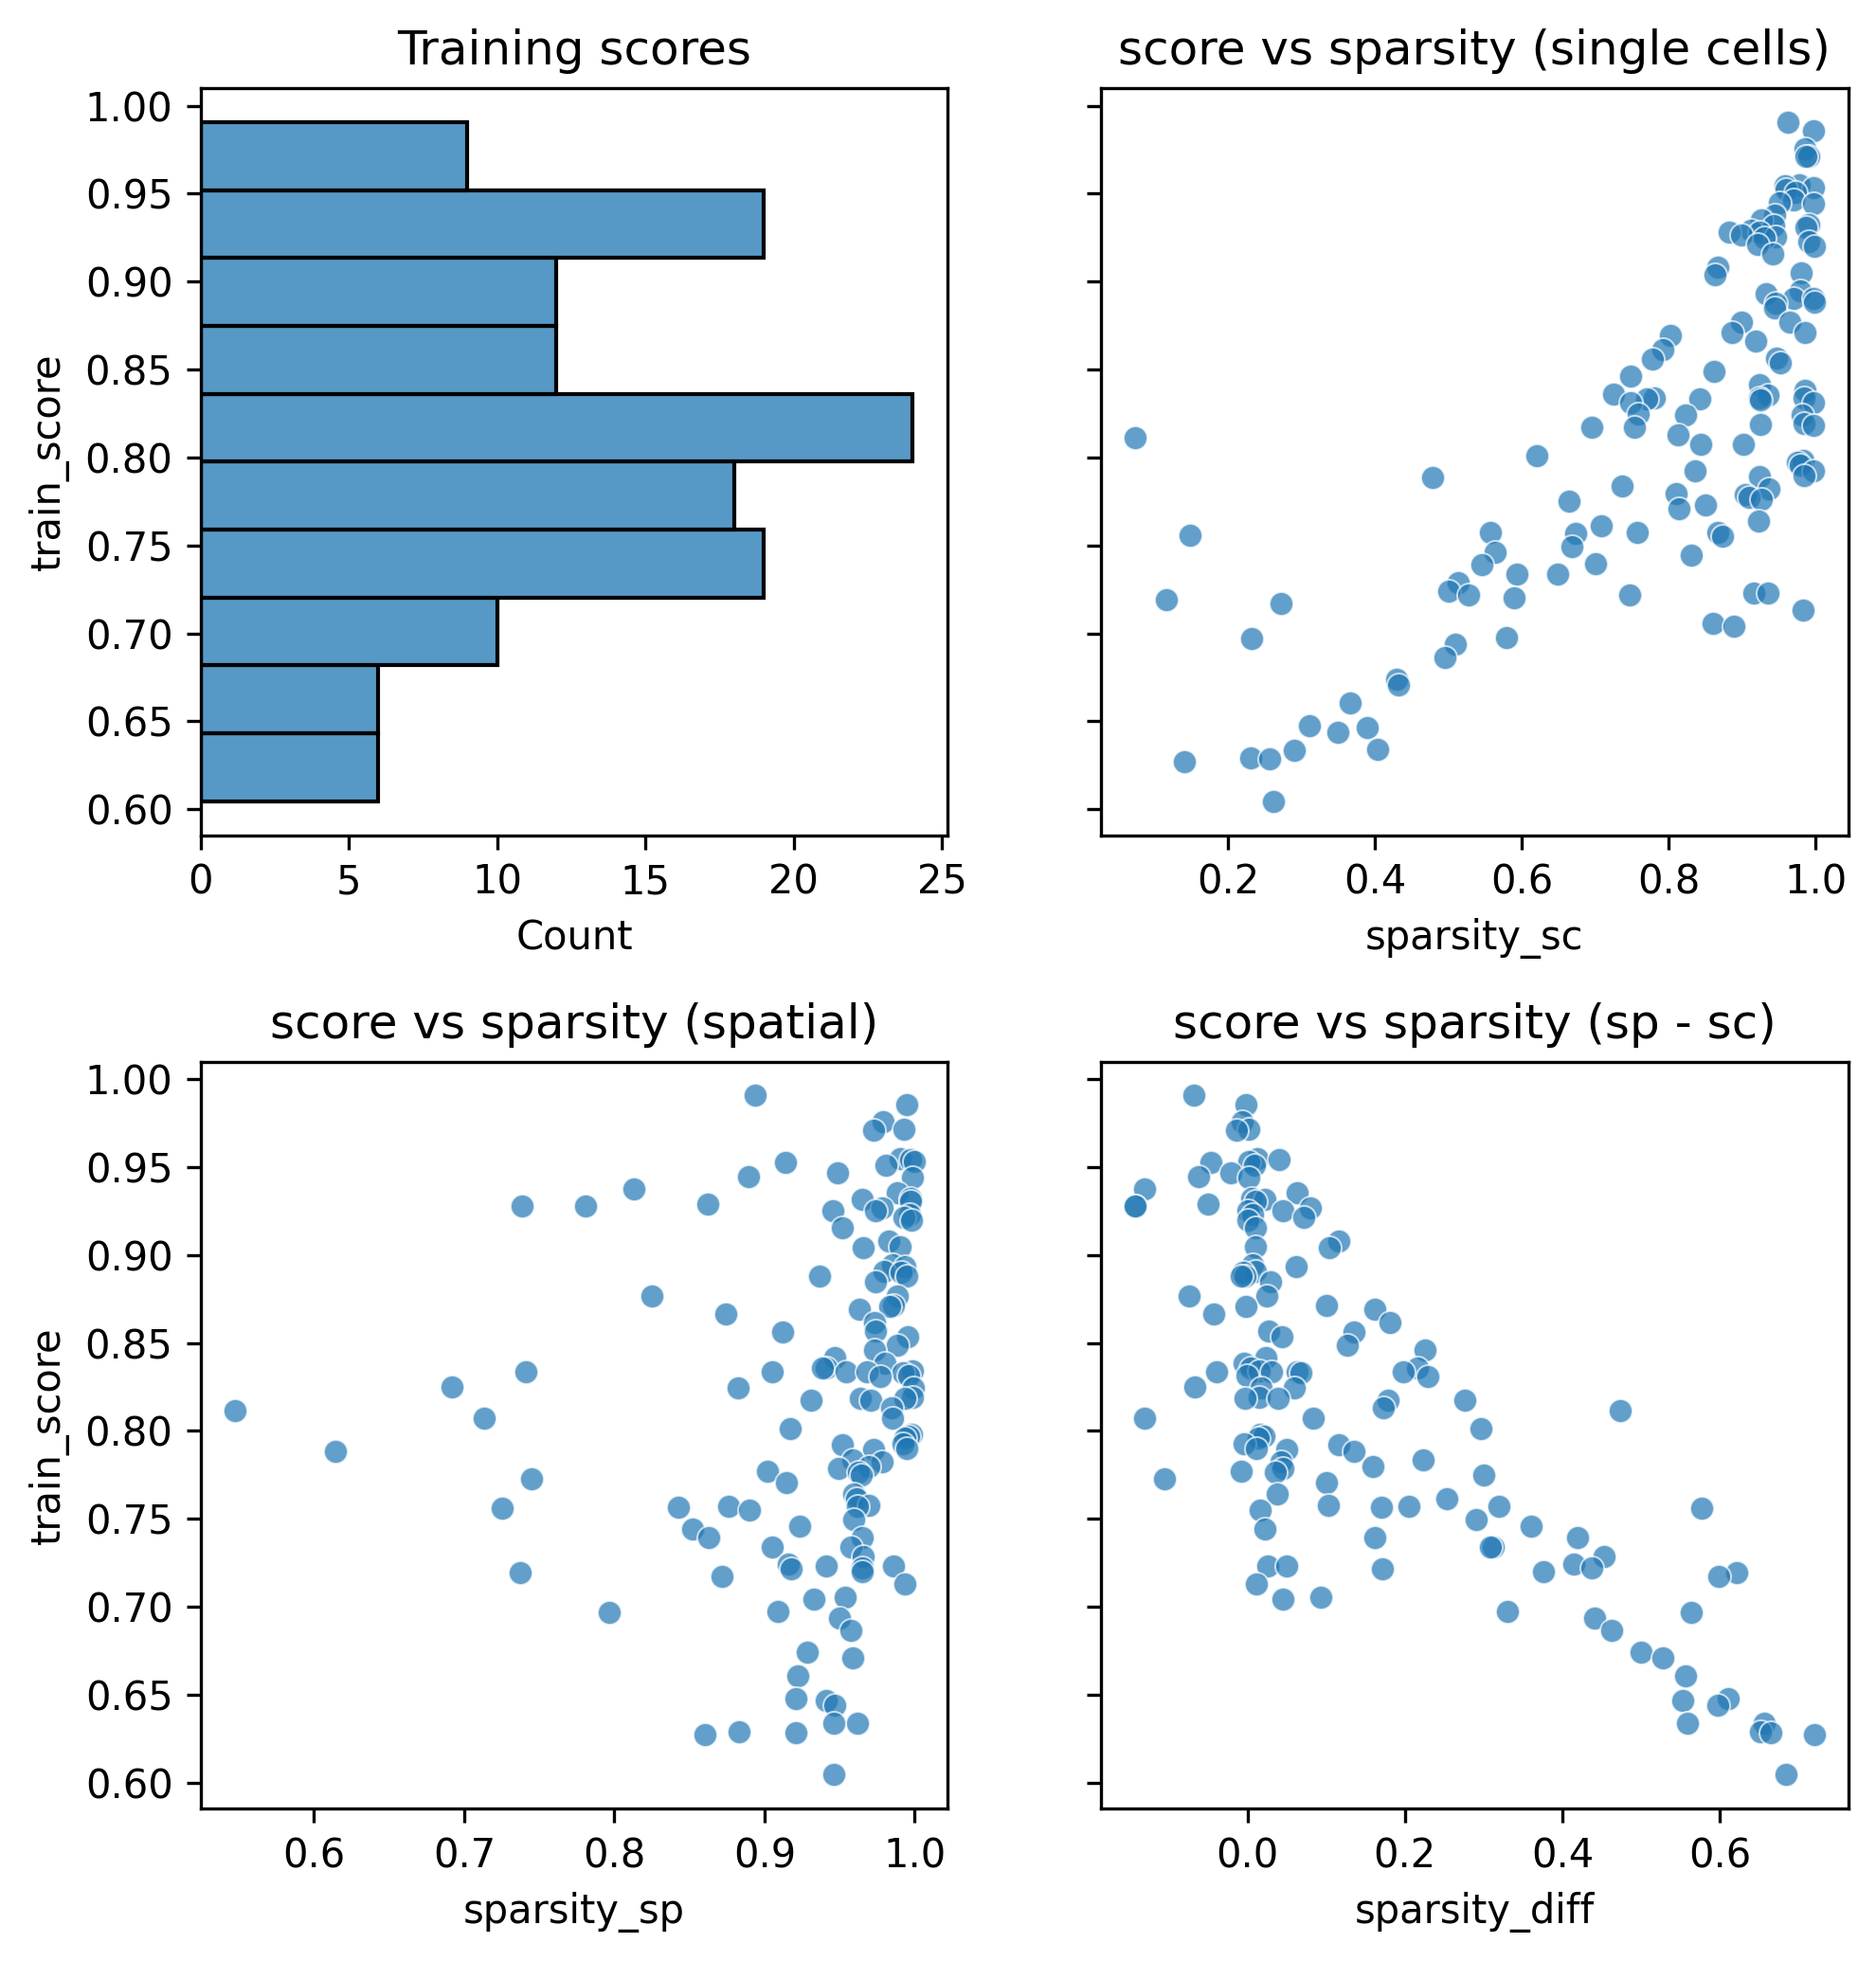

In [6]:
tg.plot_training_scores(ad_map)